In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [2]:
# Load data
data= pd.read_excel("Copper_Set.xlsx")

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# Checking null values
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
# Checking unique values
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [7]:
#converting the datatypes
columns_to_numeric = ["quantity tons", "customer", "country", "application", "thickness", "width", "selling_price"]
data[columns_to_numeric] = data[columns_to_numeric].apply(pd.to_numeric, errors="coerce")

In [8]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [9]:
convert_datetime = ['item_date','delivery date']
for i in convert_datetime:
    data[i] = pd.to_datetime(data[i],format = '%Y%m%d',errors ='coerce').dt.date

In [10]:
data.loc[data['material_ref'].str.contains('0{10,}',na=False),'material_ref']=np.nan

In [11]:
data.isna().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [12]:
fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
column_means = data[fill_mean].mean()
data[fill_mean] = data[fill_mean].fillna(column_means)

In [13]:
fill_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
columns_modes = data[fill_mode].mode().iloc[0]
data[fill_mode] = data[fill_mode].fillna(columns_modes)

In [14]:
data = data.drop(['id'],axis=1)

In [15]:
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
data['country'] = data['country'].astype(np.int64)

In [ ]:
data.shape

In [18]:
# Finding unique values
data.nunique()

item_date           250
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           595
width              1386
material_ref      11501
product_ref          33
delivery date        26
selling_price      9796
dtype: int64

In [19]:
data["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [21]:
data["status"]= data["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [22]:
data["item type"]= OrdinalEncoder().fit_transform(data[["item type"]])

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874926e+03,2.349075e+06,-2000.00,1.097037e+01,3.036499e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489812e+01,2.440579e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561375e+01,1.775391e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564827e+00,6.572303e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918036e+03,3.317947e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [ ]:
data.to_csv("Industrial_Copper_Modeling.csv",index= False)

In [24]:
data_new= pd.read_csv("Industrial_Copper_Modeling.csv")

In [25]:
data_new

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,1,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25,1,5.0,41.0,0.80,1210.0,DX51D+Z,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30,1,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32,1,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28,1,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,1,5.0,41.0,0.96,1220.0,DX51D+Z,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25,1,5.0,41.0,0.95,1500.0,DX51D+Z,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25,1,5.0,41.0,0.71,1250.0,DX51D+Z,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25,1,5.0,41.0,0.85,1250.0,DX51D+Z,164141591,2020-07-01,601.00


EXPLORATORY DATA ANALYSIS

In [26]:
eda = data_new.copy(True)

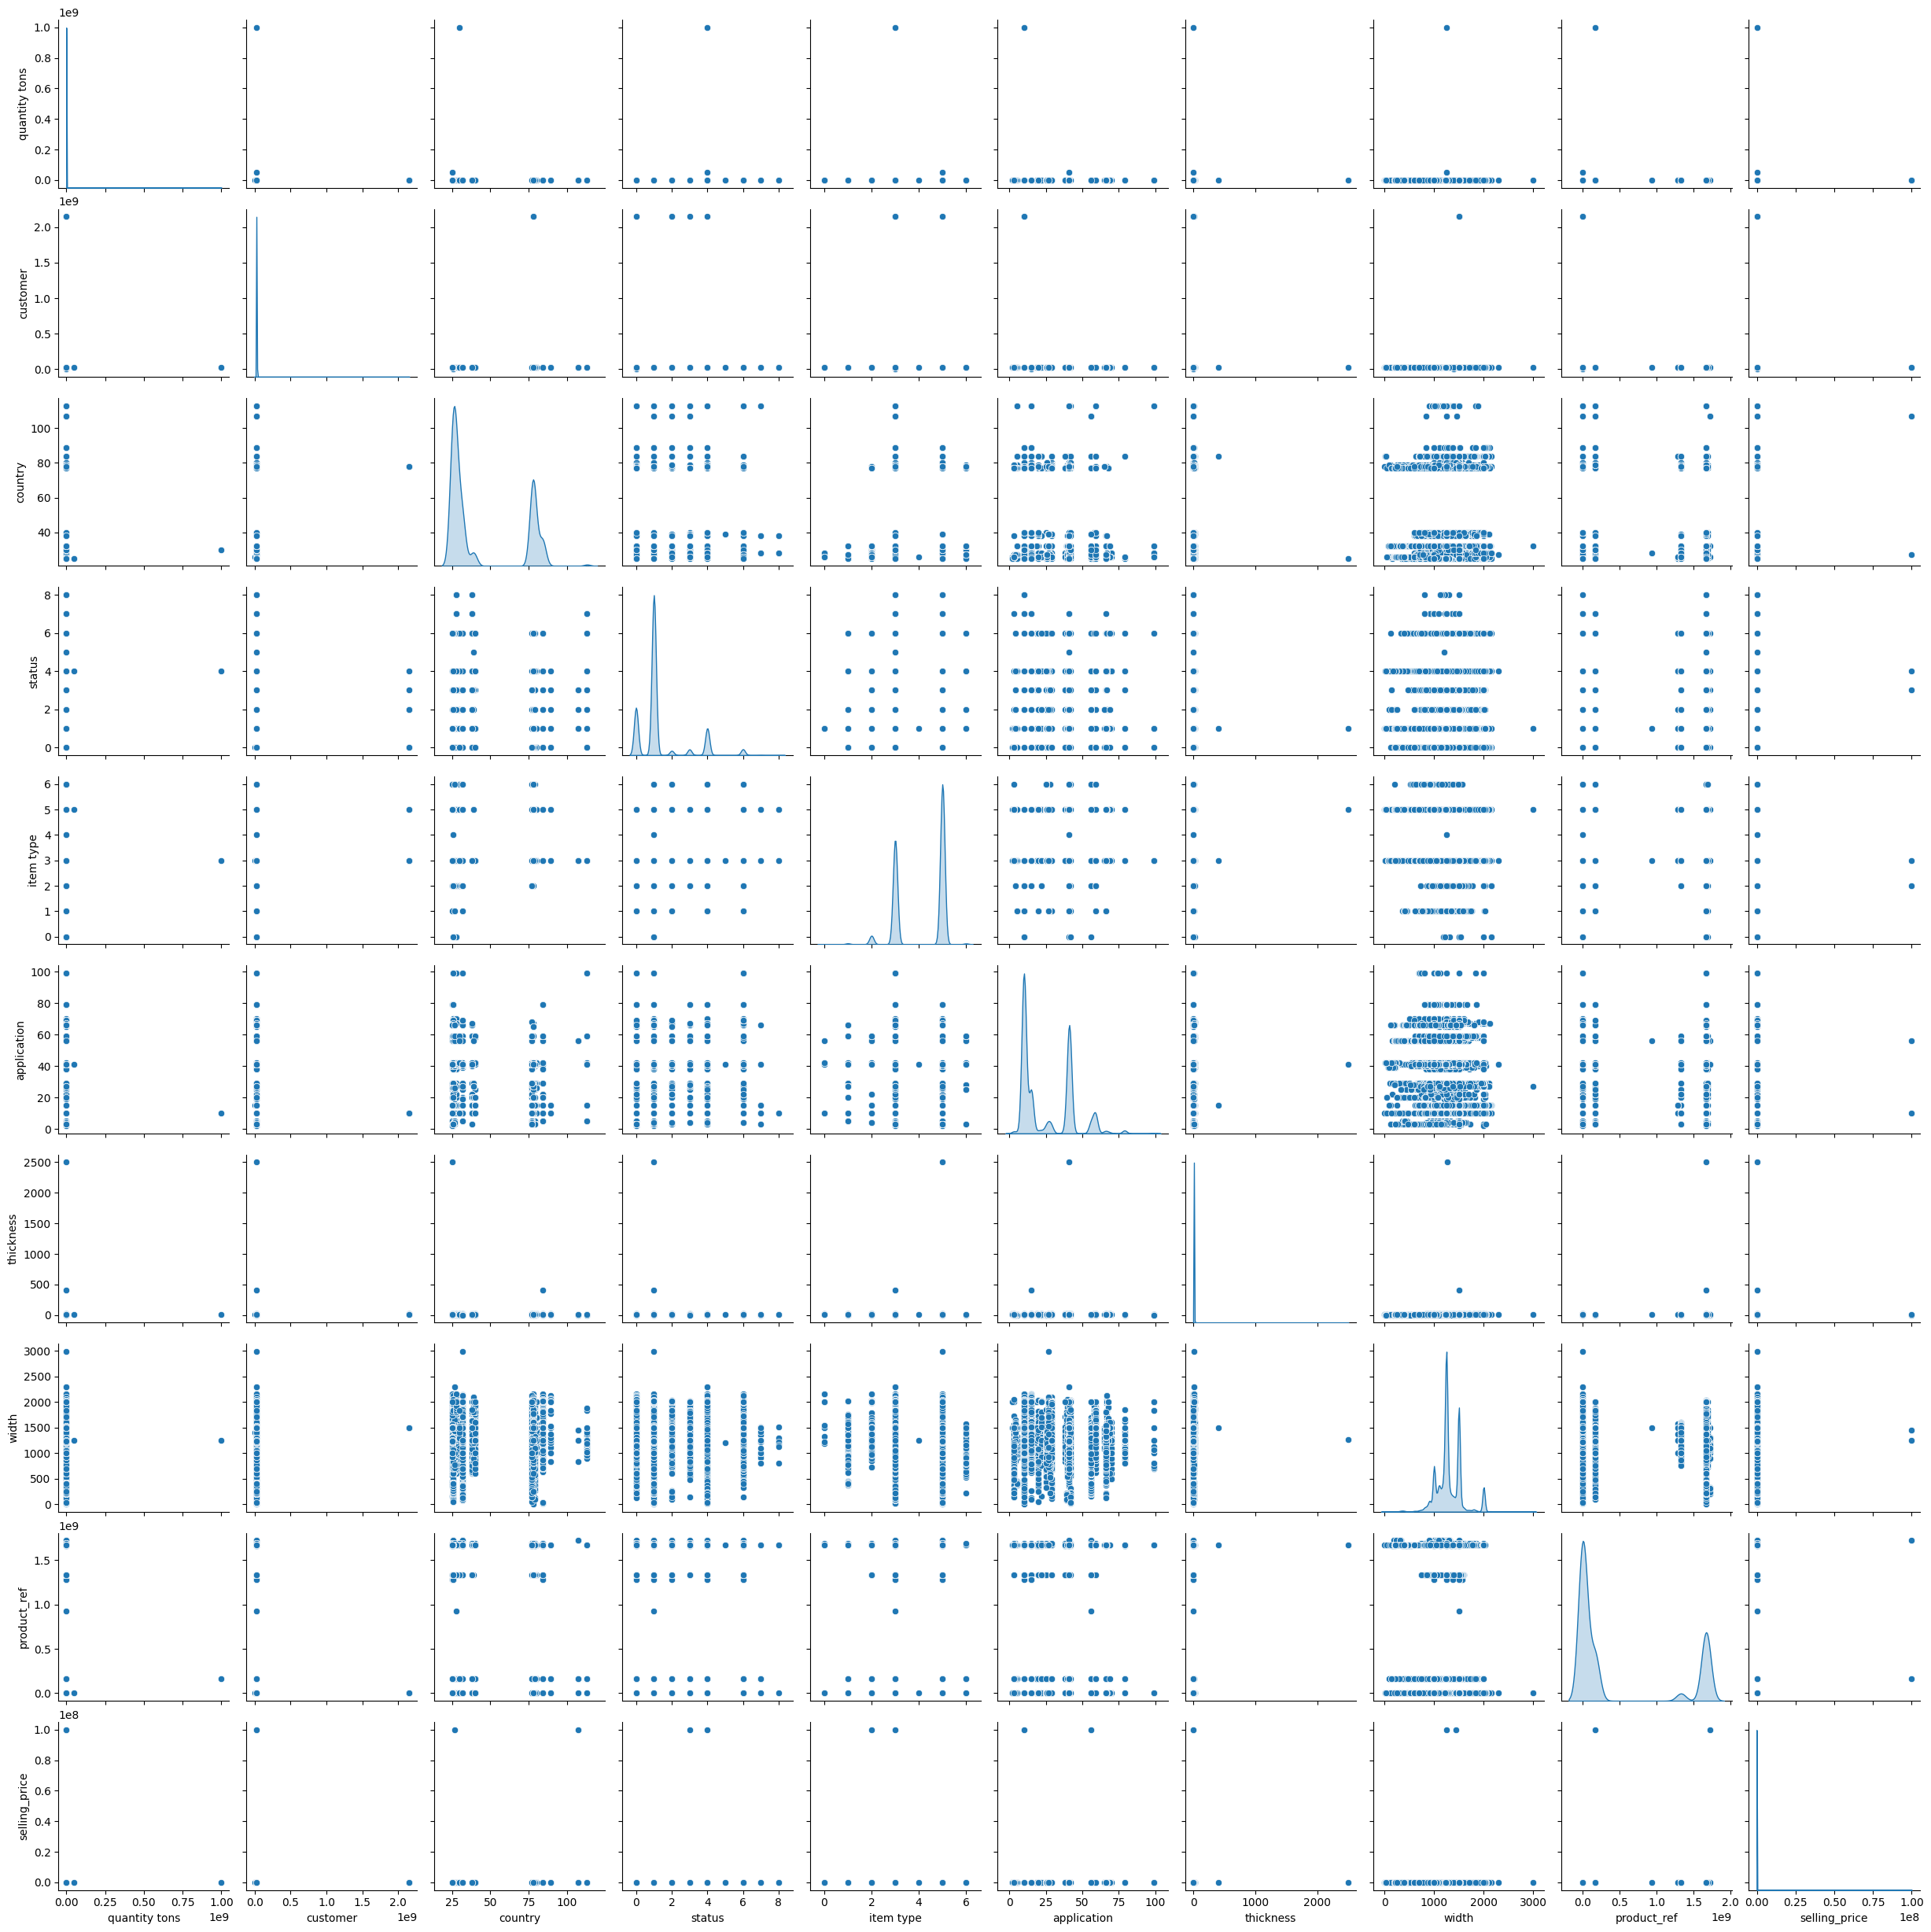

In [27]:
sns.pairplot(eda,diag_kind='kde')

In [28]:
# detecting the skewed columns 
def plot(df,column):
  
  #distplot

  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(data_new[column])
  plt.title("Distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(data_new, x= column, kde= True, bins=30,color="salmon")
  plt.title("Histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(data_new, x=column)
  plt.title("Box plot for"+" "+column)

In [29]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

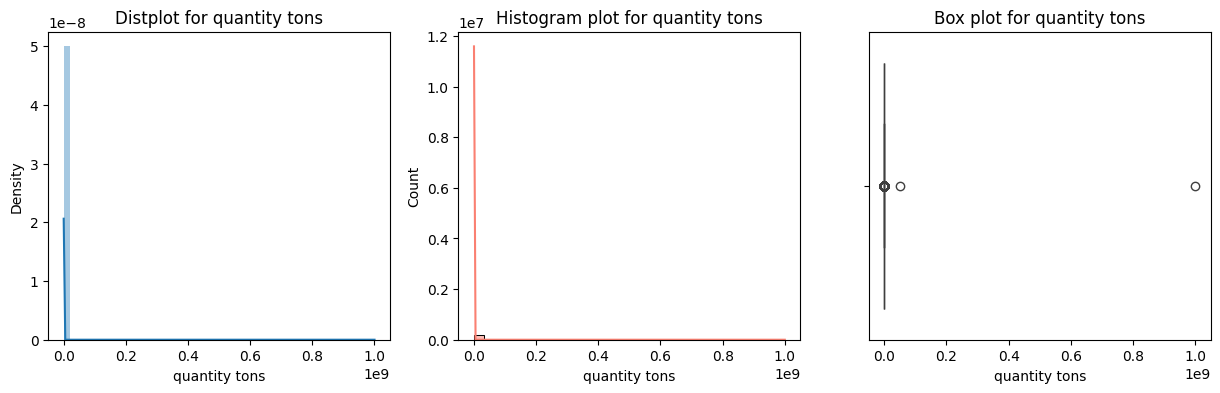

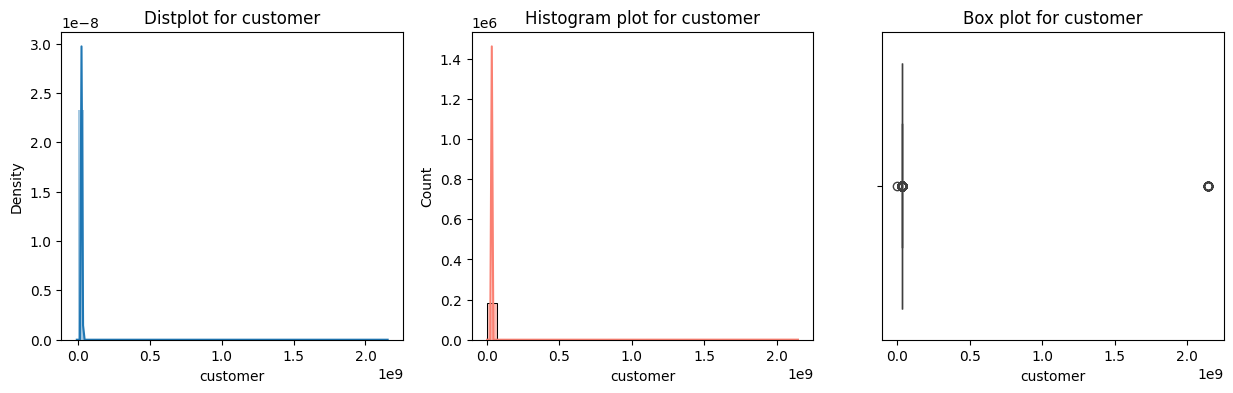

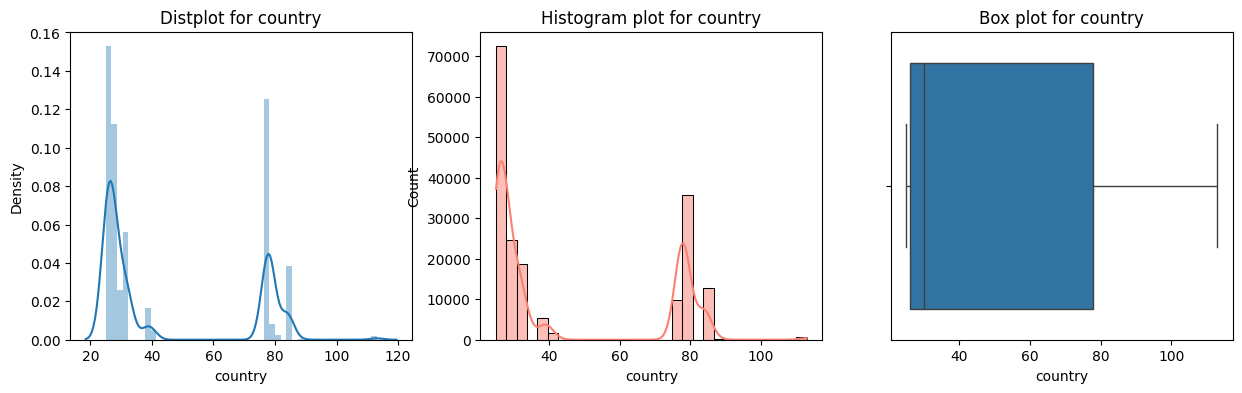

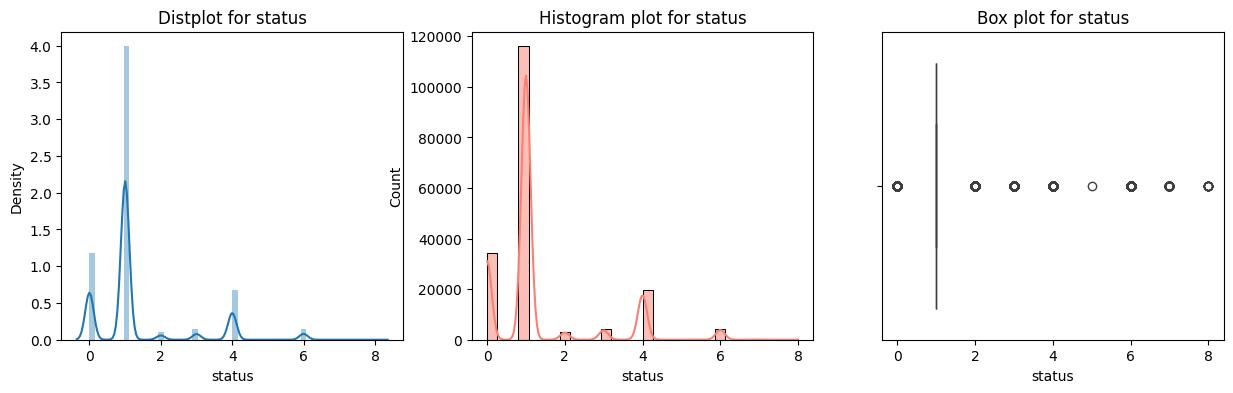

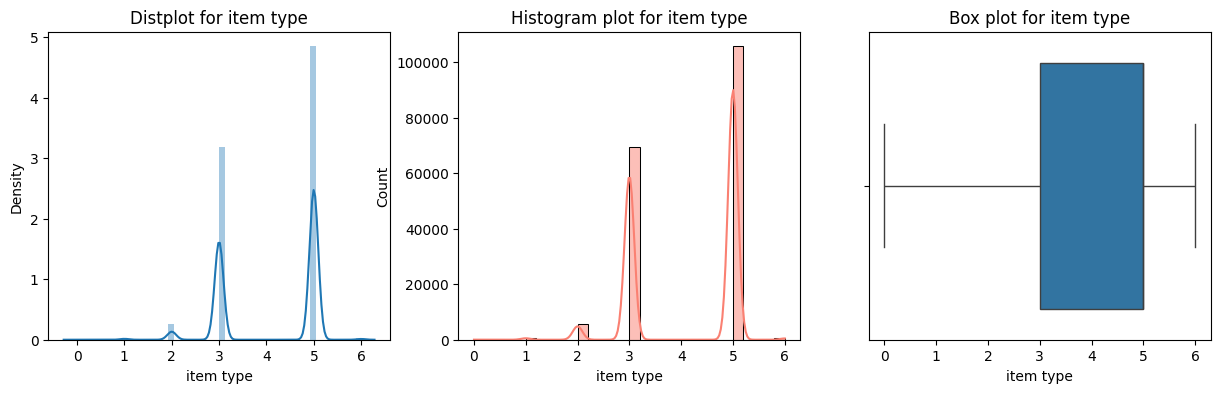

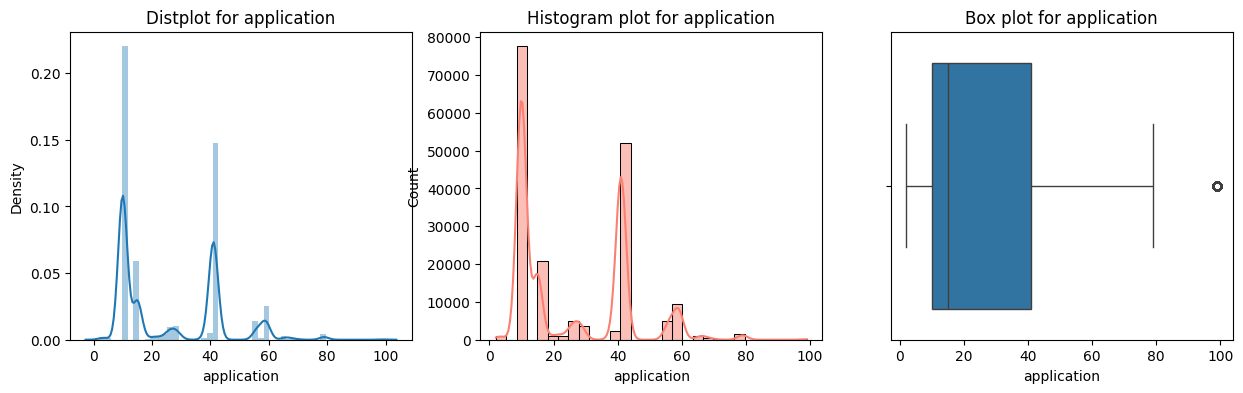

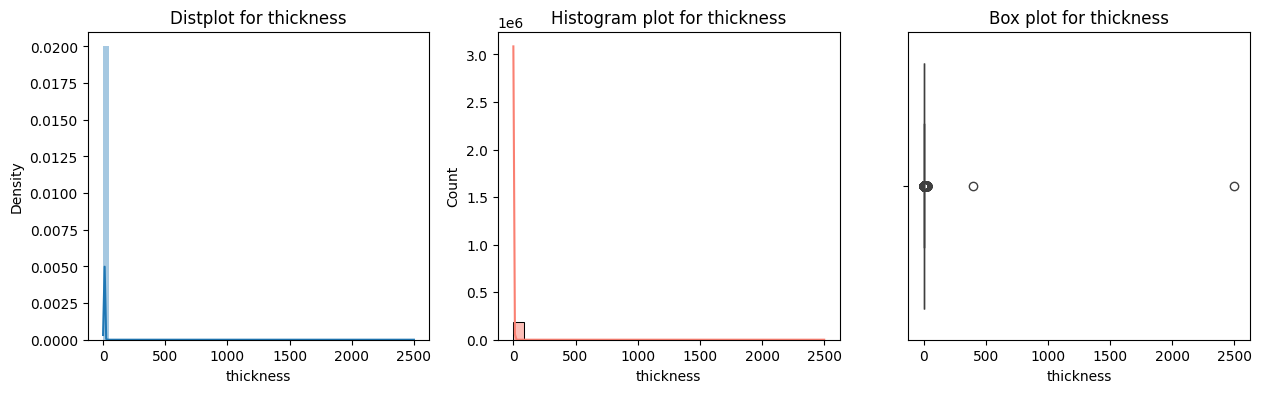

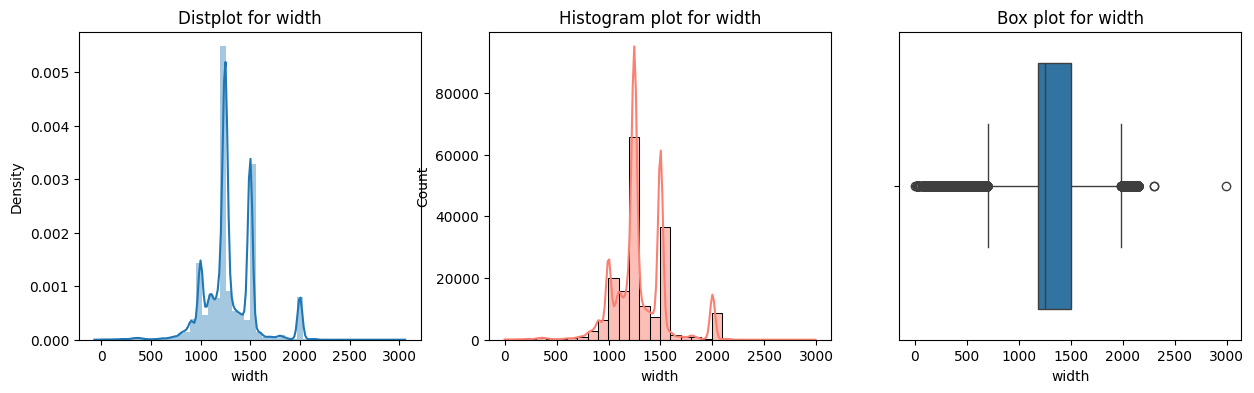

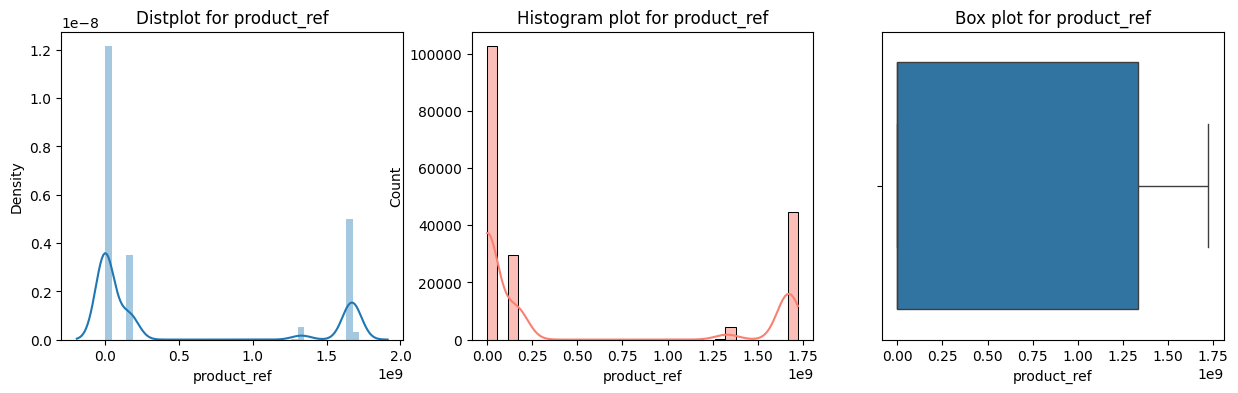

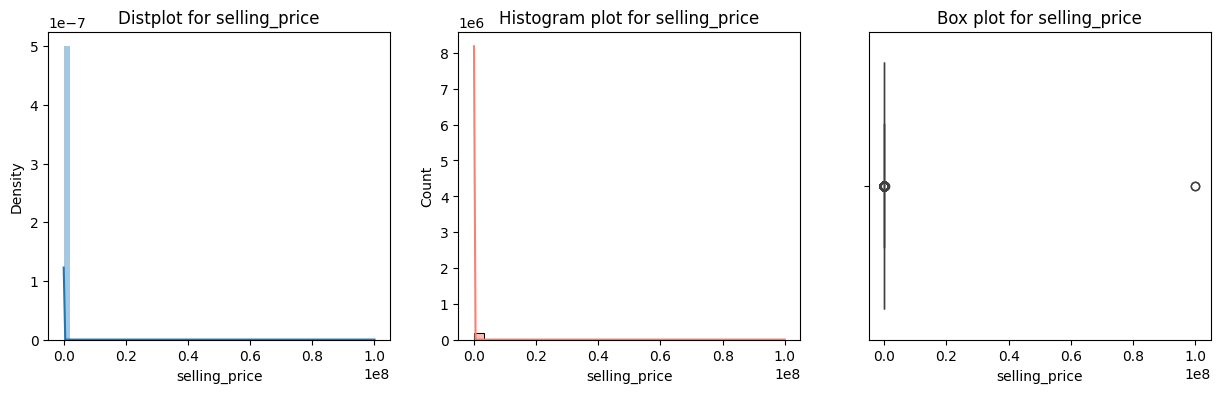

In [30]:
for i in skewed_columns:
  plot(data,i)

In [31]:
skew_data=eda.copy(True)

In [32]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    skew_data.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
width : 0 
selling_price : 7 


In [33]:
skew_data.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [34]:
skew_data.dropna(inplace=True)

In [35]:
skew_data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [36]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = skew_data[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = skew_data[column].quantile(0.30)
    Q3 = skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data = skew_data[(skew_data[column] >= lower_bound) & (skew_data[column] <= upper_bound)]

# Calculate summary statistics after removing outliers
after_stats = out_skew_data[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("statistics before removing outliers:")
print(before_stats)
print("\nstatistics after removing outliers:")
print(after_stats)

statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875291e+03       2.551133    1295.289042   1.918156e+03
std     2.349146e+06       2.977116     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036501e+01       1.500000    1250.000000   8.120000e+02
75%     6.716141e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08

statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count   1.759920e+05  175992.000000  175992.000000  175992.000000
mean    6.062891e+03       2.593758    1297.977383     821.438189
std     2.386688e+06       2.998814     261.577072     186.599149
min     1.000000e-05       0.180000       1.000000     396.000000
25

<function matplotlib.pyplot.show(close=None, block=None)>

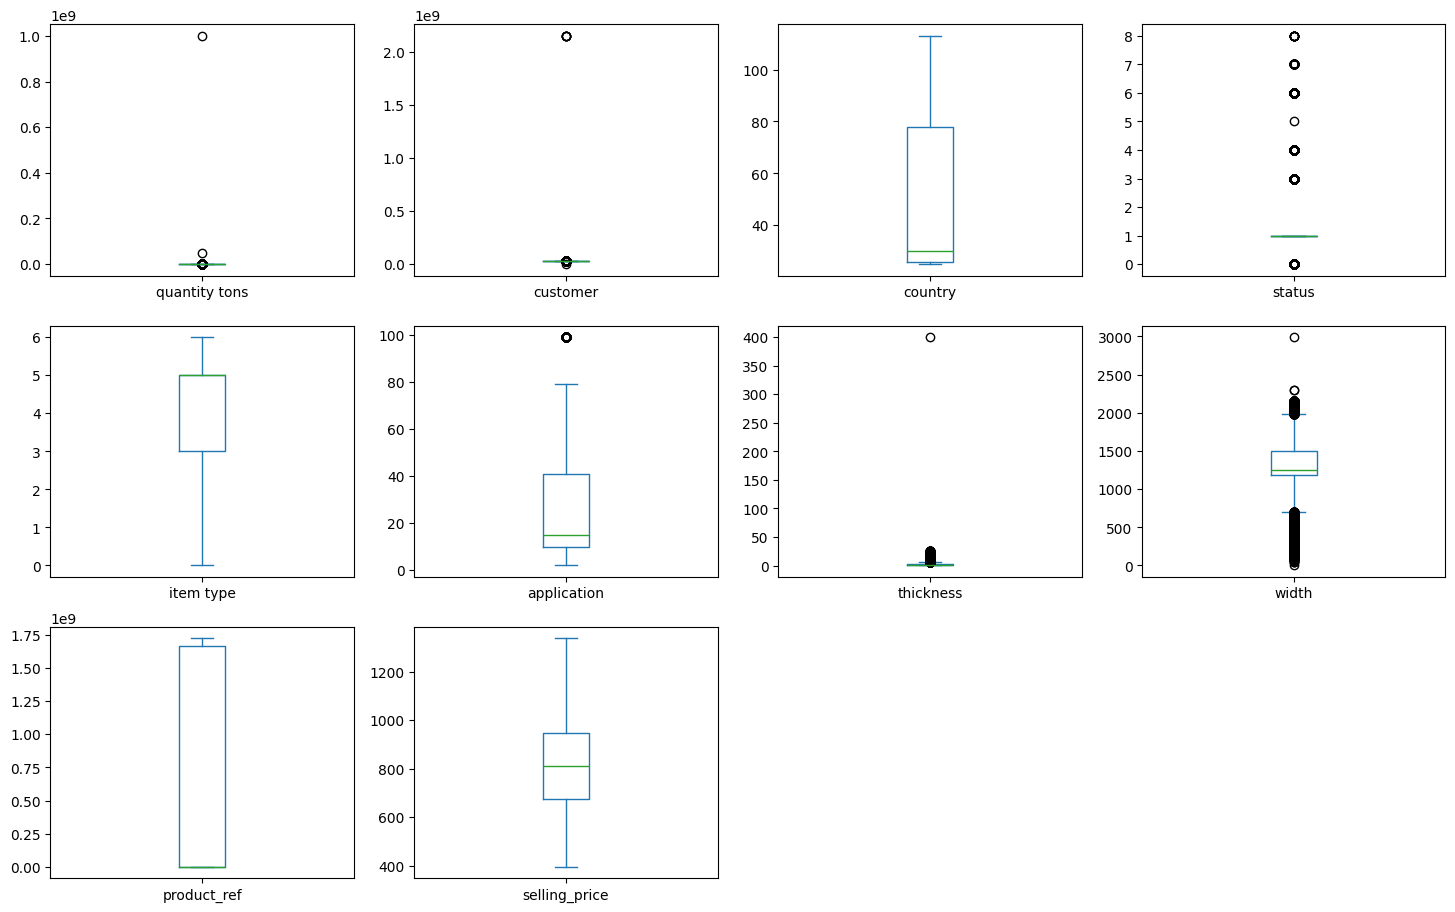

In [37]:
# After treading outerliers and skewness
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

In [38]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175992 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      175992 non-null  object 
 1   quantity tons  175992 non-null  float64
 2   customer       175992 non-null  float64
 3   country        175992 non-null  int64  
 4   status         175992 non-null  int64  
 5   item type      175992 non-null  float64
 6   application    175992 non-null  float64
 7   thickness      175992 non-null  float64
 8   width          175992 non-null  float64
 9   material_ref   175992 non-null  object 
 10  product_ref    175992 non-null  int64  
 11  delivery date  175992 non-null  object 
 12  selling_price  175992 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.8+ MB


In [39]:
model_data['item_date'] = pd.to_datetime(model_data['item_date'])
model_data['delivery date'] = pd.to_datetime(model_data['delivery date'])

#model_data['delivery_time'] = (model_data['item_date'] - model_data['delivery date']).abs().dt.days

In [40]:
model_data.dropna(subset=['item_date', 'delivery date'], inplace=True)

In [41]:
model_data['delivery_time'] = (model_data['item_date'] - model_data['delivery date']).abs().dt.days

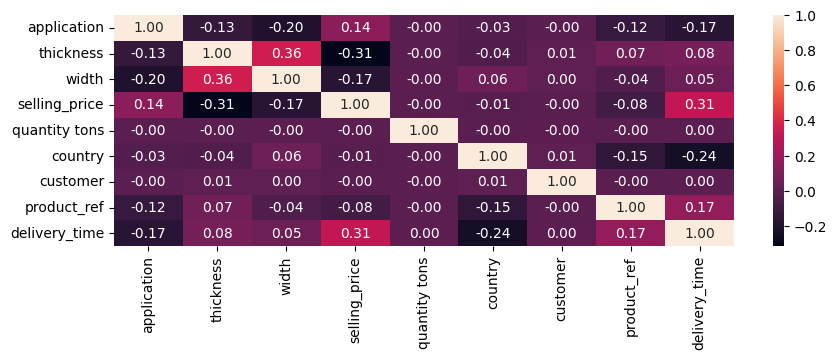

In [42]:
#Checking the correlation with using the heatmap

#x= model_data.drop(columns=["item_date","delivery date", 'material_ref']).corr()
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time']].corr()
plt.figure(figsize=(10,3))
sns.heatmap(x, annot= True, fmt="0.2f")
plt.show()

In [43]:
data_classification = model_data.copy()

In [ ]:
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
#print(country)
#print(status)
#print(item)

In [ ]:
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)

encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)

encode=LabelEncoder()
encode_item=encode.fit(item)
transformed_item = encode_item.transform(item)

#print(transformed_country)
#print(transformed_status)
#print(transformed_item)

In [46]:
import pickle

file_path_country='country.pkl'
file_path_status='status.pkl'
file_path_item='item type.pkl'

with open(file_path_country, 'wb') as file:
    pickle.dump(encode_country, file)
with open(file_path_status, 'wb') as file:
    pickle.dump(encode_status, file)
with open(file_path_item, 'wb') as file:
    pickle.dump(encode_item, file)

print(f'Pickle file created: {file_path_country}, {file_path_status},{file_path_item}')

Pickle file created: country.pkl, status.pkl,item type.pkl


In [ ]:
category_col=['status', 'item type','country']
encoder= LabelEncoder()
for i in category_col:
    #print(i)
    model_data[i] = encoder.fit_transform(model_data[i])
    #print(model_data[i].unique())

Classification Method - Predict (Won/Lose)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import xgboost as xgb
import pickle

In [49]:
# filtering the status column (won& loss)
df_classification = data_classification[(data_classification["status"] == 1) | (data_classification["status"] == 0)]

In [50]:
df_classification.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time
0,2021-04-01,54.151139,30156308.0,28,1,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91
1,2021-04-01,768.024839,30202938.0,25,1,5.0,41.0,0.80,1210.0,DX51D+Z,1668701718,2021-04-01,1047.00,0
2,2021-04-01,386.127949,30153963.0,30,1,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90
3,2021-04-01,202.411065,30349574.0,32,1,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90
4,2021-04-01,785.526262,30211560.0,28,1,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31


In [51]:
df_classification["status"].value_counts()

status
1    114475
0     34082
Name: count, dtype: int64

In [52]:
# Droping inbalanced data
x= df_classification.drop(columns=["status"],axis=1)
y= df_classification["status"]

x= df_classification.drop(columns=["material_ref"],axis=1)
y= df_classification["material_ref"]

x= df_classification.drop(columns=["item_date"],axis=1)
y= df_classification["item_date"]

In [ ]:
x.shape,y.shape

In [54]:
df_classification.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                    int64
item type               float64
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
delivery_time             int64
dtype: object

In [55]:
X = df_classification[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time']].values
y = df_classification[['status']].values

In [56]:
scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)


In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [58]:
file_path_scale2='scaling_classification.pkl'
with open(file_path_scale2, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path_scale2}')

Pickle file created: scaling_classification.pkl


In [59]:
# Create an instance of each regression model
rf_model = RandomForestClassifier()
xgb_cls_model = xgb.XGBClassifier()
svm_model = SVC(probability=True)

In [60]:
# Train the models
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [61]:
# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

In [62]:
# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

In [63]:
models = ['RandomForestClassifier', 'XGBClassifier', 'SVM']
score = [rf_accuracy, xgb_cls_accuracy, svm_accuracy]

In [64]:
print("FINDING BEST FIT MODEL FOR EVALUATION \n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

FINDING BEST FIT MODEL FOR EVALUATION 

RandomForestClassifier 0.954676000718004
XGBClassifier 0.9062331717824448
SVM 0.8078217555196554


In [65]:
print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")


Model: RandomForestClassifier contain Maximum accuracy: 0.954676000718004 


In [66]:
# Ensure y_test has more than one class for ROC AUC calculation
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(f'Distribution of y_test values: {dict(zip(unique_test, counts_test))}')

Distribution of y_test values: {0: 10285, 1: 34283}


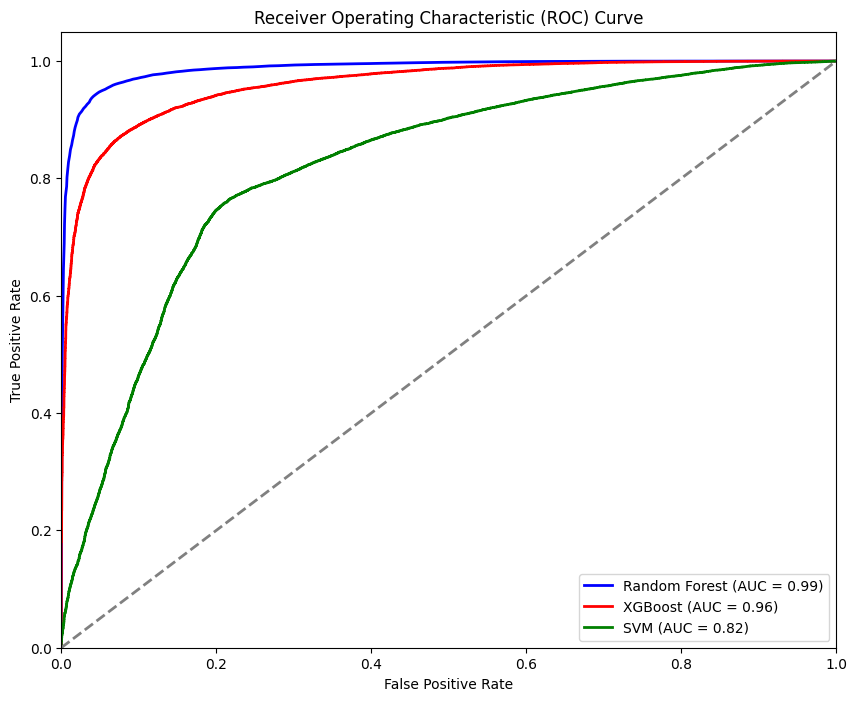

AUC Values:
Random Forest: 0.99
XGBoost: 0.96
SVM: 0.82


In [67]:
if len(unique_test) > 1:
    # Compute ROC curve and AUC for each model
    rf_probs = rf_model.predict_proba(X_test)[:, 1]
    xgb_cls_probs = xgb_cls_model.predict_proba(X_test)[:, 1]
    svm_probs = svm_model.predict_proba(X_test)[:, 1]

    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
    xgb_cls_fpr, xgb_cls_tpr, _ = roc_curve(y_test, xgb_cls_probs)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

    rf_auc = auc(rf_fpr, rf_tpr)
    xgb_cls_auc = auc(xgb_cls_fpr, xgb_cls_tpr)
    svm_auc = auc(svm_fpr, svm_tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
    plt.plot(xgb_cls_fpr, xgb_cls_tpr, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_cls_auc)
    plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM (AUC = %0.2f)' % svm_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Print AUC values
    print("AUC Values:")
    print(f"Random Forest: {rf_auc:.2f}")
    print(f"XGBoost: {xgb_cls_auc:.2f}")
    print(f"SVM: {svm_auc:.2f}")
else:
    print("ROC AUC cannot be computed because y_test contains only one class.")

In [68]:
model_class=rf_model.fit(X_train, y_train)

In [69]:
file_path_randomfprest='randomforest_classification.pkl'
with open(file_path_randomfprest, 'wb') as file:
    pickle.dump(model_class, file)
print(f'Pickle file created: {file_path_randomfprest}')

Pickle file created: randomforest_classification.pkl


In [70]:
file_path_scale = 'scaling_classification.pkl'
model_path = 'randomforest_classification.pkl' 

with open(file_path_scale, 'rb') as file:
    scaler_classify = pickle.load(file)

with open(model_path, 'rb') as file:
    clf_model = pickle.load(file)

In [89]:
user_data = np.array([[54.15113862, 2, 1500, 28, 1, 5, 10, 1670798778, 1-4-2021]])
y_pred_user= clf_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


Regression Method - Predict the Selling Price

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [72]:
x = df_classification[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time']].values
y = df_classification[['selling_price']].values

In [73]:
scaler = StandardScaler().fit(x)
X = scaler.transform(x)

In [74]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
file_path_scale='scaling.pkl'
with open(file_path_scale, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path_scale}')

Pickle file created: scaling.pkl


In [76]:
# Create an instance of each regression model
extra_tree_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
decision_tree_model = DecisionTreeRegressor()

In [77]:
# Train the models
extra_tree_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [78]:
# Make predictions on the test set
extra_tree_prediction = extra_tree_model.predict(X_test)
xgb_prediction = xgb_model.predict(X_test)
decision_tree_prediction = decision_tree_model.predict(X_test)

In [79]:
# Evaluating the models

extra_tree_mse = mean_squared_error(y_test, extra_tree_prediction)
extra_tree_mae = mean_absolute_error(y_test, extra_tree_prediction)
extra_tree_r2 = r2_score(y_test, extra_tree_prediction)

xgb_mse = mean_squared_error(y_test, xgb_prediction)
xgb_mae = mean_absolute_error(y_test, xgb_prediction)
xgb_r2 = r2_score(y_test, xgb_prediction)

decision_tree_mse = mean_squared_error(y_test, decision_tree_prediction)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_prediction)
decision_tree_r2 = r2_score(y_test, decision_tree_prediction)

In [80]:
models = ['ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [extra_tree_r2, decision_tree_r2, xgb_r2]

In [81]:
print("FINDING BEST FIT MODEL FOR EVALUATION \n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

FINDING BEST FIT MODEL FOR EVALUATION 

ExtraTreesRegressor 0.8880392739162722
DecisionTreeRegressor 0.7823562329876412
XGBRegressor 0.7885804925958466


In [82]:
print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")


Model: ExtraTreesRegressor contain Maximum R2_Score: 0.8880392739162722 


In [83]:
model_reg=extra_tree_model.fit(X_train, y_train)

In [84]:
file_path_Extratree='Extratreeregressor.pkl'
with open(file_path_Extratree, 'wb') as file:
    pickle.dump(model_reg, file)
print(f'Pickle file created: {file_path_Extratree}')

Pickle file created: Extratreeregressor.pkl


In [85]:
with open("Extratreeregressor.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [90]:
user_data = np.array([[54.15113862, 2, 1500, 28, 1, 5, 10, 1670798778, 1-4-2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price : ",y_pred[0])

Predicted selling price :  733.5183999999999
